<a href="https://colab.research.google.com/github/AlishaJoy/EDA_netflix/blob/main/_Netflix_movies_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA ON NETFLIX MOVIES**




In [15]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import os
import time
import requests
import tarfile 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
file = "/content/gdrive/MyDrive/Colab Notebooks/netflix_titles.csv"
ds = pd.read_csv(file)
ds.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Unnamed: 12
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,NaN
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,NaN
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011.0,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",NaN
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009.0,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",NaN
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008.0,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,NaN


In [32]:
ds.sample(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Unnamed: 12
137,s138,TV Show,72 Cutest Animals,NaN,NaN,Australia,"June 1, 2016",2016.0,TV-PG,1 Season,"Docuseries, International TV Shows, Science & ...",This series examines the nature of cuteness an...,NaN
874,NaN,Movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1343,NaN,Movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970,NaN,Movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1603,NaN,Movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2133,NaN,Movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832,NaN,Movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,s242,TV Show,A Touch of Green,NaN,"Weber Yang, Cheryl Yang, Tien Hsin, Gabriel La...",Taiwan,"July 1, 2020",2016.0,TV-MA,1 Season,"International TV Shows, TV Dramas","Amid the turmoil of China's civil war, familie...",NaN
129,s130,Movie,6-5=2,Bharat Jain,"Prashantt Guptha, Gaurav Paswala, Gaurav Kotha...",India,"November 1, 2017",2014.0,TV-MA,103 min,"Horror Movies, International Movies, Thrillers",Six friends decide to undertake a grueling mou...,NaN
900,NaN,Movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       499 non-null    object 
 1   type          499 non-null    object 
 2   title         499 non-null    object 
 3   director      387 non-null    object 
 4   cast          451 non-null    object 
 5   country       479 non-null    object 
 6   date_added    498 non-null    object 
 7   release_year  499 non-null    float64
 8   rating        498 non-null    object 
 9   duration      499 non-null    object 
 10  listed_in     499 non-null    object 
 11  description   499 non-null    object 
 12  Unnamed: 12   1 non-null      object 
dtypes: float64(1), object(12)
memory usage: 227.5+ KB


In [10]:
ds.describe().T 

,count,mean,std,min,25%,50%,75%,max
release_year,499.0,2014.569138,7.637937,1966.0,2014.0,2017.0,2019.0,2020.0


In [11]:
ds.describe()

,release_year
count,499.000000
mean,2014.569138
std,7.637937
min,1966.000000
25%,2014.000000
50%,2017.000000
75%,2019.000000
max,2020.000000


In [13]:
ds.isnull().sum()

show_id         1740
type            1740
title           1740
director        1852
cast            1788
country         1760
date_added      1741
release_year    1740
rating          1741
duration        1740
listed_in       1740
description     1740
Unnamed: 12     2238
dtype: int64

<Axes: >

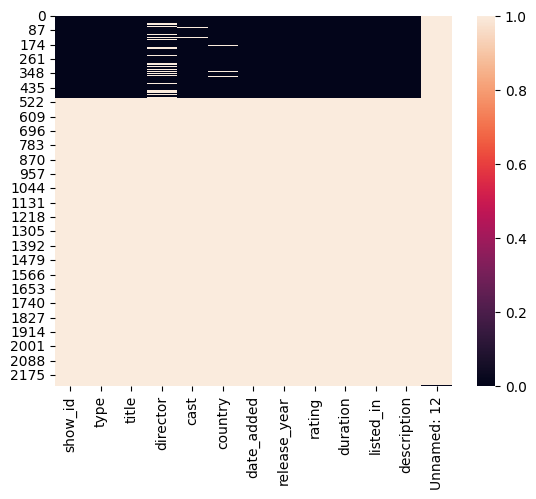

In [16]:
sb.heatmap(ds.isnull())

In [25]:
print("Unique Number Of type is:{}".format(ds['type'].nunique()))
print("Unique Number Of country is:{}".format(ds['country'].nunique()))


Unique Number Of type is:2
Unique Number Of country is:95


In [28]:
ds.nunique()

show_id         499
type              2
title           499
director        360
cast            448
country          95
date_added      345
release_year     38
rating           11
duration        121
listed_in       156
description     499
Unnamed: 12       1
dtype: int64